In [1]:
import gym
import random
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import matplotlib.pyplot as plt

In [2]:
EPISODES =50
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200  # high EPS_DECAY --> low amount of dicrese
GAMMA = 0.8 # Discount rate 
LR = 0.001
BATCH_SIZE = 64

In [3]:
class DQNAgent:
    def __init__(self):
        self.model = nn.Sequential(
            nn.Linear(4, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        )
        self.optimizer = optim.Adam(self.model.parameters(), LR)
        self.steps_done = 0
        self.memory = deque(maxlen=10000)

    def memorize(self, state, action, reward, next_state):
        self.memory.append((state,
                            action,
                            torch.FloatTensor([reward]),
                            torch.FloatTensor([next_state])))
    
    def act(self, state):
        eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * self.steps_done / EPS_DECAY)
        self.steps_done += 1
        if random.random() > eps_threshold:
            return self.model(state).data.max(1)[1].view(1, 1)
        else:
            return torch.LongTensor([[random.randrange(2)]])
    
    def learn(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        states, actions, rewards, next_states = zip(*batch)

        states = torch.cat(states)
        actions = torch.cat(actions)
        rewards = torch.cat(rewards)
        next_states = torch.cat(next_states)

        current_q = self.model(states).gather(1, actions)
        max_next_q = self.model(next_states).detach().max(1)[0]
        expected_q = rewards + (GAMMA * max_next_q)
        
        loss = F.mse_loss(current_q.squeeze(), expected_q)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()


In [4]:
env = gym.make('CartPole-v0')
agent = DQNAgent()
score_history = []

In [5]:
for e in range(1, EPISODES+1):
    state = env.reset()
    steps = 0
    while True:
        env.render()
        state = torch.FloatTensor([state])
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action.item())

        # 게임이 끝났을 경우 마이너스 보상주기
        if done:
            reward = -1

        agent.memorize(state, action, reward, next_state)
        agent.learn()

        state = next_state
        steps += 1

        if done:
            print("에피소드:{0} 점수: {1}".format(e, steps))
            score_history.append(steps)
            break

에피소드:1 점수: 27
에피소드:2 점수: 61
에피소드:3 점수: 10
에피소드:4 점수: 13
에피소드:5 점수: 15
에피소드:6 점수: 11
에피소드:7 점수: 10
에피소드:8 점수: 16
에피소드:9 점수: 15
에피소드:10 점수: 12
에피소드:11 점수: 12
에피소드:12 점수: 13
에피소드:13 점수: 9
에피소드:14 점수: 9
에피소드:15 점수: 10
에피소드:16 점수: 9
에피소드:17 점수: 11
에피소드:18 점수: 10
에피소드:19 점수: 8
에피소드:20 점수: 8
에피소드:21 점수: 11
에피소드:22 점수: 9
에피소드:23 점수: 13
에피소드:24 점수: 15
에피소드:25 점수: 22
에피소드:26 점수: 40
에피소드:27 점수: 21
에피소드:28 점수: 52
에피소드:29 점수: 43
에피소드:30 점수: 62
에피소드:31 점수: 43
에피소드:32 점수: 41
에피소드:33 점수: 32
에피소드:34 점수: 73
에피소드:35 점수: 50
에피소드:36 점수: 89
에피소드:37 점수: 130
에피소드:38 점수: 155
에피소드:39 점수: 79


KeyboardInterrupt: 

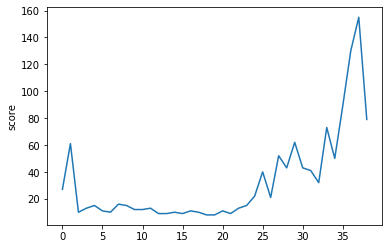

In [6]:
plt.plot(score_history)
plt.ylabel('score')
plt.show()

In [3]:
print(torch.__version__)

1.0.1
